<a href="https://colab.research.google.com/github/jagvgithub/Classification_Regression_models/blob/main/Modelo_Retencion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# paquetes necesarios
!pip install pycaret # Modelos ML
!pip install gender_guesser # Estimación de género

# Librerias necearias
from google.colab import files  # carga de datos
import pandas as pd # manipulación de bases de datos
import numpy as np # manipulación de bases de datos
import matplotlib.pyplot as plt # Visualizaciones
import keyword # Listado de palabras reservadas
from wordcloud import WordCloud # Nube de palabras
import gender_guesser.detector as gender # Estimación de género a partir del primer y segundo nombre

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 49.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.

# obtención de datos

In [ ]:
from google.colab import files
import pandas as pd
# Cargar el archivo CSV
uploaded = files.upload()

Saving Modelo_retencion.xlsx to Modelo_retencion.xlsx


In [ ]:
# Ruta al archivo xlsx en Google Colab
ruta_archivo = '/content/Modelo_retencion.xlsx'

# Leer el archivo xlsx usando pandas
datos = pd.read_excel(ruta_archivo)
datos=pd.DataFrame(datos)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:241: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
datos_numericos = datos.select_dtypes(include=['int', 'float'])
# Mostrar los tipos de datos de las columnas seleccionadas
print(datos_numericos.dtypes.head(60))

DocumentoCliente                       int64
Ahorro de la red                       int64
CDT                                    int64
Cartera vendida                        int64
Castigados                             int64
Crédito hipotecario                    int64
Crédito libre inversión                int64
Crédito vehículo                       int64
Cuenta corriente                       int64
FlexiDigital                           int64
Leasing vehículo                       int64
Libranza                               int64
Maquina agrícola                       int64
Nomina Finandina                       int64
Otros activos                          int64
Otros ahorros                          int64
Plan mayor                             int64
Redescuentos                           int64
TDC Digital                            int64
TDC Física                             int64
pqr                                    int64
Ataques                                int64
login_prom

In [ ]:
proporcion_datos_faltantes = (round(datos.isnull().sum() / len(datos),2) * 100).sort_values(ascending=False)
print(proporcion_datos_faltantes.head(50))

FVDSC1                               50.0
name2                                28.0
ActividadEconomica                   21.0
Deuda financiera-TodasObligFinanc     5.0
RangoEdad                             5.0
Riesgo                                5.0
Acierta_Master                        5.0
Deuda financiera con Finandina        5.0
Municipio                             1.0
name1                                 1.0
DocumentoCliente                      0.0
antiguedad                            0.0
Ingresos                              0.0
TRXTDC                                0.0
fechamin                              0.0
TRXTD                                 0.0
productos_Activo_hoy                  0.0
productos                             0.0
tiene_moras                           0.0
productos_activo                      0.0
Cupo_total_activo                     0.0
mora_activo                           0.0
cuentas_ahorro                        0.0
productos_tdc                     

# Preparación y limpieza de datos

In [ ]:
datos['Genero'] = None

# Función para estimar el género de una lista de nombres
def estimar_genero_por_bloques(nombres):
    detector = gender.Detector()
    generos = [detector.get_gender(nombre) for nombre in nombres]
    return generos

# Aplicar la función a las dos columnas
datos['Genero_estimado_1'] = estimar_genero_por_bloques(datos['name1'])
datos['Genero_estimado_2'] = estimar_genero_por_bloques(datos['name2'])

datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_1'],datos['Genero'])
datos['Genero']=np.where(datos['Genero'].isna(),datos['Genero_estimado_2'],datos['Genero'])

def mapear_genero(genero):
    if 'female' in genero:
        return 'Femenino'
    elif genero == 'F':
        return 'Femenino'
    elif pd.isnull(genero):
        return 'NA'
    else:
        return 'Masculino'

# Aplicar la función al DataFrame
datos['Genero'] = datos['Genero'].apply(lambda x: mapear_genero(x))
datos['Genero'].value_counts()

Genero
Masculino    127124
Femenino      61882
Name: count, dtype: int64

In [ ]:
# limpieza de datos
for col in datos.columns:
    if datos[col].dtype == 'object':  # Verificar si la columna es de tipo string
        datos[col] = datos[col].fillna('sininformacion')  # Reemplazar valores faltantes
        datos[col] = datos[col].astype(str).str.lstrip().str.rstrip().str.strip()  # Aplicar strip a los valores
    elif np.issubdtype(datos[col].dtype, np.number):  # Verificar si la columna es de tipo numérico
        promedio = datos[col].mean()  # Calcular el promedio de la columna
        datos[col] = datos[col].fillna(promedio)

In [ ]:
import pandas as pd
import numpy as np

# Asegúrate de que todas las variables sean numéricas
numerical_data = datos.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numerical_data.corr()

# Establecer un umbral para alta correlación
threshold = 0.8

# Seleccionar las parejas de variables con alta correlación
high_corr_var = np.where(np.abs(correlation_matrix) > threshold)
high_corr_pairs = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y])
                   for x, y in zip(*high_corr_var) if x != y and x < y]

# Imprimir las parejas de variables con alta correlación
print("Variables con alta correlación (umbral > 0.8):")
for var1, var2, corr in high_corr_pairs:
    print(f"{var1} y {var2} tienen una correlación de {corr:.2f}")


Variables con alta correlación (umbral > 0.8):
tiene_moras y retener tienen una correlación de -0.83


In [ ]:
datos.columns

Index(['DocumentoCliente', 'Ahorro de la red', 'CDT', 'Cartera vendida',
       'Castigados', 'Crédito hipotecario', 'Crédito libre inversión',
       'Crédito vehículo', 'Cuenta corriente', 'FlexiDigital',
       'Leasing vehículo', 'Libranza', 'Maquina agrícola', 'Nomina Finandina',
       'Otros activos', 'Otros ahorros', 'Plan mayor', 'Redescuentos',
       'TDC Digital', 'TDC Física', 'Departamento', 'Municipio', 'TipoPersona',
       'pqr', 'Ataques', 'login_promedio', 'activohoy', 'antiguedad',
       'RangoEdad', 'Ingresos', 'Riesgo', 'Acierta_Master',
       'Deuda financiera con Finandina', 'Deuda financiera-TodasObligFinanc',
       'TRXTDC', 'TRXTD', 'productos_Activo_hoy', 'productos',
       'productos_activo', 'Cupo_total_activo', 'cuentas_ahorro',
       'productos_tdc', 'Cupo_total_tdc', 'retener', 'Genero'],
      dtype='object')

In [ ]:
datos = datos.drop(columns={'fechamin','FVDSC1','ActividadEconomica','CodigoCIIU','Genero_estimado_1','Genero_estimado_2','tiene_moras','mora_tdc','mora_activo','name1','name2'})

# Testeo y Entrenamiento

In [ ]:
data=datos.sample(frac=0.75,random_state=786).reset_index(drop=True) # entrenamiento
data_unusen =datos.drop(data.index).reset_index(drop=True) # testeo
# Verificar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", data.shape)
print("Tamaño del conjunto de prueba:", data_unusen.shape)

Tamaño del conjunto de entrenamiento: (141754, 45)
Tamaño del conjunto de prueba: (47252, 45)


In [ ]:
from pycaret.classification import * # la data ya tiene una marcacion de  01
data.reset_index(drop=True, inplace=True)  # Restablecer los índices y eliminar los índices existentes ## debido al concatenado
#exp_clf101 = setup(data=data, target='Fraude', session_id=10001)  # Configurar el experimento de clasificación
#exp_clf101 = setup(data=data, target='retener', session_id=10001)
exp_clf101 = setup(
    data=data,               # El DataFrame que contiene los datos a usar
    target='retener',        # La columna objetivo que se quiere predecir
    session_id=550055,        # Un número para establecer la semilla del generador de números aleatorios para reproducibilidad
    fold_strategy='stratifiedkfold',  # Estrategia de validación cruzada estratificada, asegura que cada fold tenga la misma proporción de cada clase
    preprocess=True,         # Si se debe realizar preprocesamiento en los datos
    imputation_type='simple',# Tipo de imputación a utilizar, 'simple' indica técnicas simples de imputación
    numeric_imputation='mean',# Método de imputación para variables numéricas, aquí se usa la media de la columna
    categorical_imputation='mode', # Método de imputación para variables categóricas, aquí se usa la moda (el valor más frecuente)
    max_encoding_ohe=25      # Número máximo de categorías para usar one-hot encoding, si hay más de 25 categorías, se utilizarán otras técnicas de codificación
)


,Description,Value
0,Session id,550055
1,Target,retener
2,Target type,Binary
3,Original data shape,"(141754, 45)"
4,Transformed data shape,"(141754, 58)"
5,Transformed train set shape,"(99227, 58)"
6,Transformed test set shape,"(42527, 58)"
7,Numeric features,38
8,Categorical features,6
9,Preprocess,True


In [ ]:
best_model=compare_models()

# Comparar solo algunos modelos específicos
#models_to_compare = ['lr', 'dt', 'rf', 'xgboost', 'knn']  # Lista de modelos a incluir
#best_model = compare_models(include=models_to_compare)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8359,0.9063,0.9121,0.8402,0.8747,0.6381,0.6427,9.7470
xgboost,Extreme Gradient Boosting,0.8350,0.9045,0.9078,0.8418,0.8735,0.6370,0.6408,3.5710
rf,Random Forest Classifier,0.8327,0.8996,0.9147,0.8347,0.8728,0.6297,0.6354,29.1530
et,Extra Trees Classifier,0.8288,0.8943,0.9093,0.8333,0.8696,0.6218,0.6269,24.8680
gbc,Gradient Boosting Classifier,0.8246,0.8940,0.9236,0.8199,0.8687,0.6077,0.6175,41.3480
ada,Ada Boost Classifier,0.8149,0.8780,0.9082,0.8174,0.8604,0.5882,0.5955,9.5110
ridge,Ridge Classifier,0.8088,0.8577,0.9165,0.8057,0.8575,0.5705,0.5816,1.2700
lda,Linear Discriminant Analysis,0.8088,0.8577,0.9140,0.8071,0.8572,0.5713,0.5815,1.9100
dt,Decision Tree Classifier,0.7644,0.7491,0.8087,0.8146,0.8117,0.4970,0.4970,3.5810
qda,Quadratic Discriminant Analysis,0.7530,0.8331,0.7705,0.8305,0.7956,0.4817,0.4953,1.9320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

Light Gradient Boosting Machine (LightGBM) es un marco de aprendizaje automático basado en el algoritmo de boosting de gradiente, desarrollado por Microsoft. Está diseñado para ser altamente eficiente y escalable, y se utiliza principalmente para tareas de clasificación y regresión. Aquí te dejo una definición y una explicación de cómo funciona este modelo.

*Definición de LightGBM*

LightGBM es una implementación del algoritmo de boosting de gradiente que utiliza árboles de decisión como base. A diferencia de otras implementaciones de boosting, como XGBoost, LightGBM está optimizado para ser más rápido y consumir menos memoria. Esto se logra a través de técnicas específicas como el "histogram-based" approach para la construcción de árboles y la "leaf-wise" growth strategy para la expansión de nodos.

Cómo Funciona LightGBM

Boosting de Gradiente:

LightGBM, al igual que otros algoritmos de boosting de gradiente, construye modelos secuenciales, donde cada modelo intenta corregir los errores del modelo anterior.
Comienza con un modelo simple (por ejemplo, un árbol de decisión) y ajusta modelos adicionales en función del gradiente del error.
Construcción de Árboles Basada en Histogramas:

LightGBM utiliza un enfoque basado en histogramas para la construcción de árboles. Esto significa que los valores continuos de las características se agrupan en bins (o intervalos) para reducir la complejidad computacional y el uso de memoria.
Este enfoque permite que LightGBM sea más rápido en el entrenamiento y más eficiente en términos de memoria en comparación con la construcción tradicional de árboles de decisión.
Estrategia de Crecimiento Leaf-Wise:

En lugar de crecer los árboles nivel por nivel (depth-wise), LightGBM utiliza una estrategia de crecimiento leaf-wise, donde el nodo hoja más prometedor (el que reduce más el error) se expande primero.
Esta estrategia puede llevar a árboles más profundos pero generalmente produce una mejor precisión con un número dado de nodos.
Optimización y Reducción de Overfitting:

LightGBM incluye varios parámetros y técnicas para evitar el overfitting, como la regularización L1/L2, el ajuste de la tasa de aprendizaje (learning rate), y la submuestreo de datos y características.
También incluye la capacidad de utilizar early stopping para detener el entrenamiento si el modelo no mejora después de un número determinado de iteraciones.
Manejo de Datos Grandes:

LightGBM es capaz de manejar grandes volúmenes de datos y un alto número de características. Esto lo hace adecuado para aplicaciones en las que otros algoritmos de boosting podrían no ser prácticos debido a limitaciones de tiempo o memoria.
Ventajas de LightGBM
Velocidad: LightGBM es significativamente más rápido en el entrenamiento en comparación con otros algoritmos de boosting.
Eficiencia de Memoria: Utiliza menos memoria gracias a su enfoque basado en histogramas.
Escalabilidad: Puede manejar grandes conjuntos de datos y muchas características.
Precisión: Tiende a ser muy preciso debido a su estrategia de crecimiento leaf-wise y otras técnicas avanzadas de optimización.
Aplicaciones
LightGBM se utiliza en una amplia gama de aplicaciones, desde sistemas de recomendación, predicción de ventas, detección de fraudes hasta problemas de clasificación de texto y imágenes.

En resumen, LightGBM es una herramienta poderosa para el aprendizaje supervisado, especialmente en escenarios donde la eficiencia y la escalabilidad son críticas. Su diseño innovador le permite superar a muchos otros algoritmos de boosting en términos de velocidad y uso de recursos sin sacrificar precisión.








LightGBM (Light Gradient Boosting Machine)
Definición:
LightGBM es una implementación de gradient boosting diseñada para ser eficiente en términos de velocidad y uso de memoria. Es particularmente útil para conjuntos de datos grandes y de alta dimensionalidad. Utiliza algoritmos de aprendizaje de decisión en hoja (leaf-wise) en lugar de nivel (level-wise), lo que lo hace más rápido y eficiente comparado con otros métodos de boosting como XGBoost.

Ventajas:

Velocidad y Eficiencia: LightGBM es extremadamente rápido en comparación con otros algoritmos de boosting, debido a su enfoque de decisión en hoja y optimizaciones específicas.
Escalabilidad: Puede manejar grandes volúmenes de datos y alta dimensionalidad de manera efectiva.
Precisión: Suele lograr una alta precisión en sus predicciones debido a sus técnicas avanzadas de optimización.
Soporte para GPU: LightGBM puede aprovechar GPUs para acelerar el entrenamiento.
Desventajas:

Sensibilidad a Hiperparámetros: LightGBM puede ser sensible a la configuración de hiperparámetros, lo que puede requerir un esfuerzo considerable en la fase de ajuste.
Riesgo de Sobreajuste: Debido a su capacidad para construir árboles complejos, puede sobreajustar si no se aplican técnicas adecuadas de regularización.
Interpretabilidad: Los modelos de boosting suelen ser menos interpretables en comparación con otros métodos como los árboles de decisión simples o modelos lineales.
Espero que esta información te sea útil para tu trabajo con PyCaret y LightGBM.



### Definiciones de Métricas

#### Accuracy (Exactitud)
**Definición**: Es la proporción de predicciones correctas sobre el total de predicciones realizadas. Es una métrica comúnmente utilizada para evaluar el rendimiento de un modelo de clasificación.

**Fórmula**:


$${Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total de ejemplos}}$$


#### AUC (Área Bajo la Curva)
**Definición**: Es el área bajo la curva ROC (Receiver Operating Characteristic). Mide la capacidad de un modelo para distinguir entre clases. Un AUC de 0.5 indica un modelo sin capacidad de discriminación, mientras que un AUC de 1 indica un modelo perfecto.

**Fórmula**: No tiene una fórmula cerrada simple, se calcula generalmente mediante integración numérica de la curva ROC.

#### F1-Score
**Definición**: Es la media armónica de la precisión (precision) y la sensibilidad (recall). Es útil cuando se necesita un balance entre precisión y sensibilidad.

**Fórmula**:
$$
\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Donde:
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

#### Precision (Precisión)
**Definición**: Es la proporción de verdaderos positivos sobre todas las predicciones positivas realizadas por el modelo.

**Fórmula**:
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

#### Recall (Sensibilidad o Tasa de Verdaderos Positivos)
**Definición**: Es la proporción de verdaderos positivos sobre todas las instancias que son realmente positivas.

**Fórmula**:
$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

#### Kappa (Cohen's Kappa)
**Definición**: Es una medida de la concordancia entre dos evaluadores que considera la concordancia observada y la concordancia esperada por azar.

**Fórmula**:
$$
\kappa = \frac{P_o - P_e}{1 - P_e}
$$

Donde \(P_o\) es la proporción observada de concordancia y \(P_e\) es la proporción esperada de concordancia por azar.

### LightGBM (Light Gradient Boosting Machine)

**Definición**: LightGBM es una implementación de gradient boosting diseñada para ser eficiente en términos de velocidad y uso de memoria. Es particularmente útil para conjuntos de datos grandes y de alta dimensionalidad. Utiliza algoritmos de aprendizaje de decisión en hoja (leaf-wise) en lugar de nivel (level-wise), lo que lo hace más rápido y eficiente comparado con otros métodos de boosting como XGBoost.

**Ventajas**:
- **Velocidad y Eficiencia**: LightGBM es extremadamente rápido en comparación con otros algoritmos de boosting, debido a su enfoque de decisión en hoja y optimizaciones específicas.
- **Escalabilidad**: Puede manejar grandes volúmenes de datos y alta dimensionalidad de manera efectiva.
- **Precisión**: Suele lograr una alta precisión en sus predicciones debido a sus técnicas avanzadas de optimización.
- **Soporte para GPU**: LightGBM puede aprovechar GPUs para acelerar el entrenamiento.

**Desventajas**:
- **Sensibilidad a Hiperparámetros**: LightGBM puede ser sensible a la configuración de hiperparámetros, lo que puede requerir un esfuerzo considerable en la fase de ajuste.
- **Riesgo de Sobreajuste**: Debido a su capacidad para construir árboles complejos, puede sobreajustar si no se aplican técnicas adecuadas de regularización.
- **Interpretabilidad**: Los modelos de boosting suelen ser menos interpretables en comparación con otros métodos como los árboles de decisión simples o modelos lineales.


In [ ]:
modelo = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8342,0.9055,0.9109,0.8389,0.8734,0.6345,0.6390
1,0.8331,0.9046,0.9050,0.8412,0.8719,0.6333,0.6368
2,0.8390,0.9112,0.9117,0.8442,0.8767,0.6457,0.6496
3,0.8350,0.9026,0.9146,0.8376,0.8744,0.6355,0.6407
4,0.8384,0.9086,0.9119,0.8434,0.8763,0.6442,0.6483
5,0.8286,0.9013,0.9071,0.8344,0.8692,0.6218,0.6264
6,0.8383,0.9090,0.9148,0.8415,0.8766,0.6432,0.6479
7,0.8399,0.9101,0.9116,0.8455,0.8773,0.6478,0.6516
8,0.8377,0.9053,0.9189,0.8382,0.8767,0.6409,0.6467


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_modelo = tune_model(modelo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8366,0.9064,0.9103,0.8423,0.8750,0.6405,0.6445
1,0.8327,0.9054,0.9030,0.8420,0.8714,0.6329,0.6361
2,0.8406,0.9117,0.9098,0.8475,0.8775,0.6500,0.6534
3,0.8370,0.9049,0.9159,0.8392,0.8759,0.6400,0.6452
4,0.8400,0.9095,0.9103,0.8464,0.8772,0.6484,0.6520
5,0.8303,0.9021,0.9096,0.8349,0.8707,0.6253,0.6301
6,0.8402,0.9101,0.9125,0.8453,0.8776,0.6483,0.6523
7,0.8407,0.9106,0.9111,0.8468,0.8778,0.6499,0.6535
8,0.8399,0.9065,0.9165,0.8423,0.8779,0.6466,0.6514


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


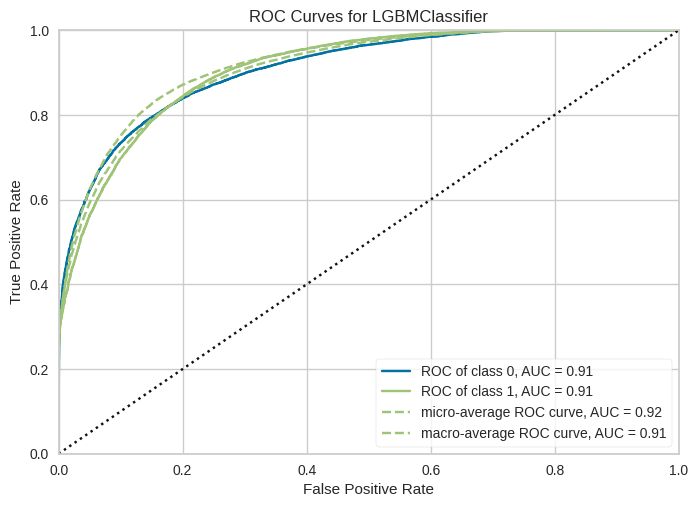

In [ ]:
plot_model(tuned_modelo,plot='auc')

In [ ]:
plot_model(tuned_modelo,plot='threshold')

KeyboardInterrupt: 

<Figure size 800x550 with 0 Axes>

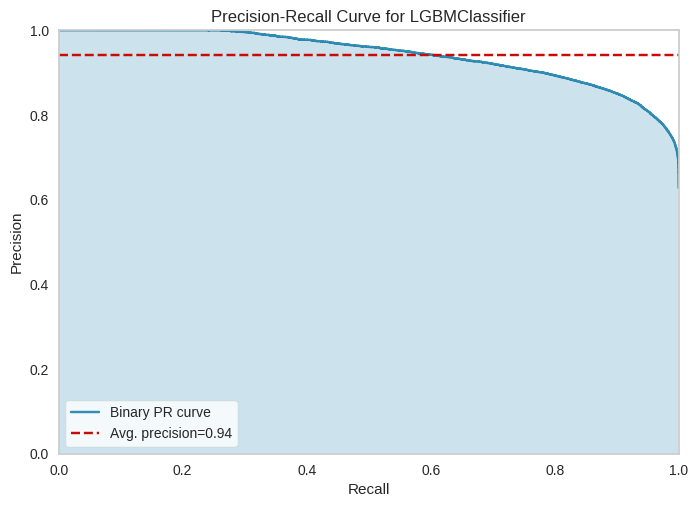

In [ ]:
plot_model(tuned_modelo,plot='pr')

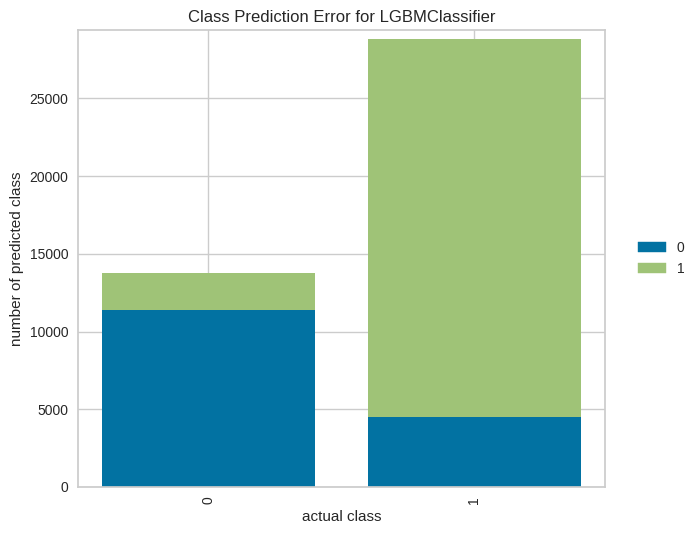

In [ ]:
plot_model(tuned_modelo,plot='error')

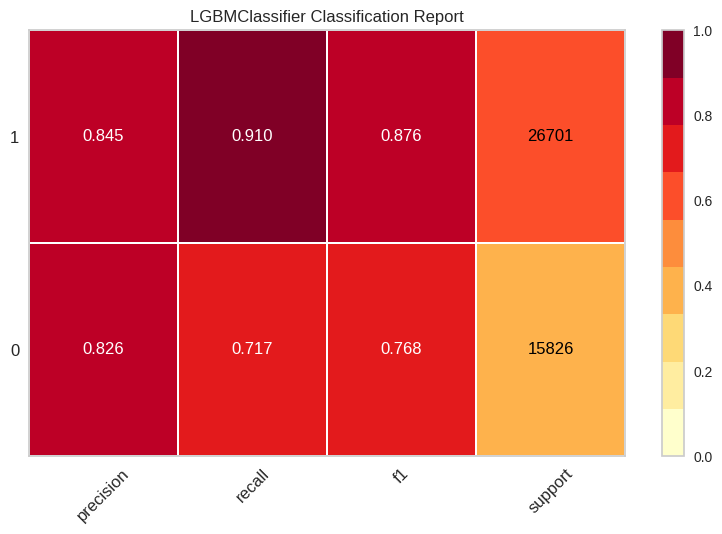

In [ ]:
plot_model(tuned_modelo,plot='class_report')

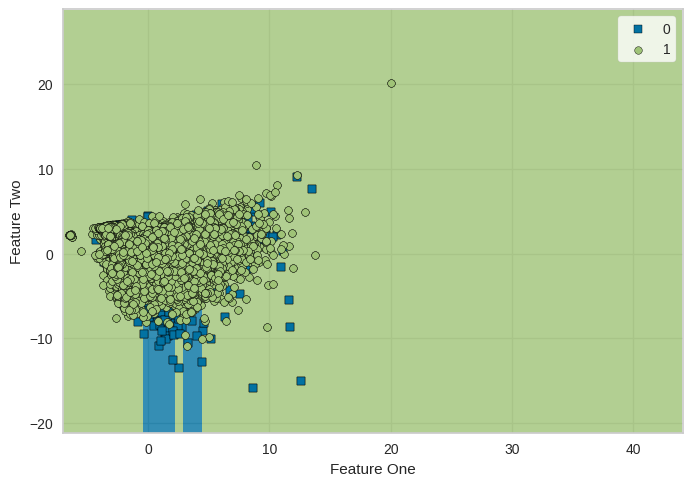

In [ ]:
plot_model(tuned_modelo,plot='boundary')

In [ ]:
plot_model(tuned_modelo,plot='rfe')

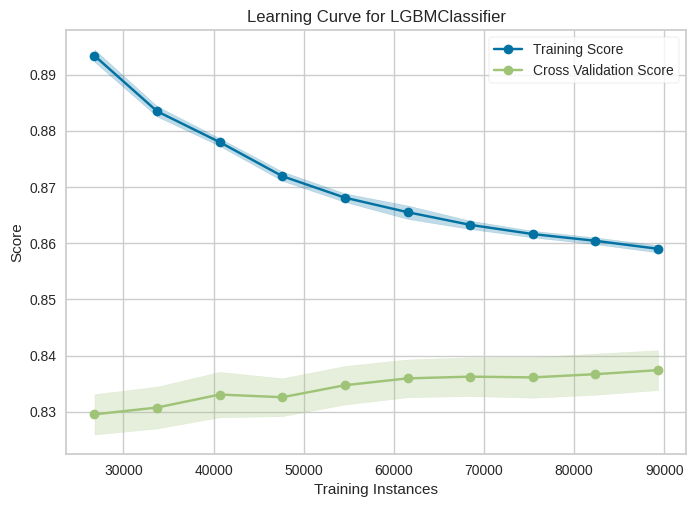

In [ ]:
plot_model(tuned_modelo,plot='learning')

In [ ]:
plot_model(tuned_modelo,plot='manifold')

In [ ]:
plot_model(tuned_modelo,plot='calibration')

In [ ]:
plot_model(tuned_modelo,plot='vc')

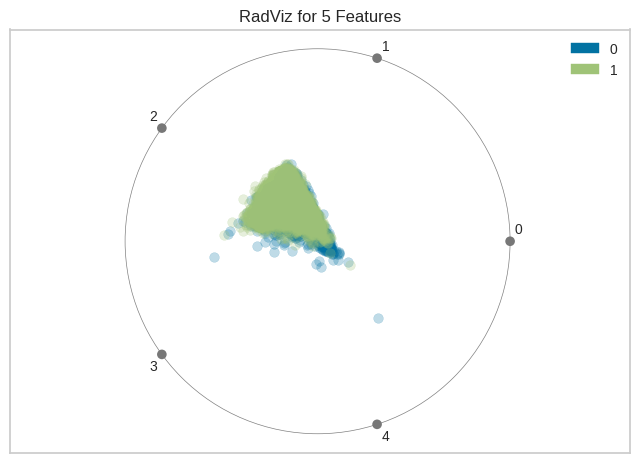

In [ ]:
plot_model(tuned_modelo,plot='dimension')

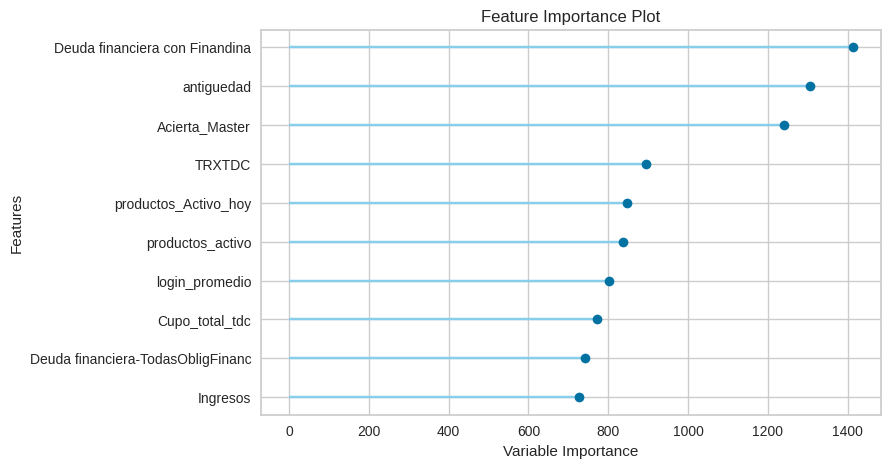

In [ ]:
plot_model(tuned_modelo,plot='feature')

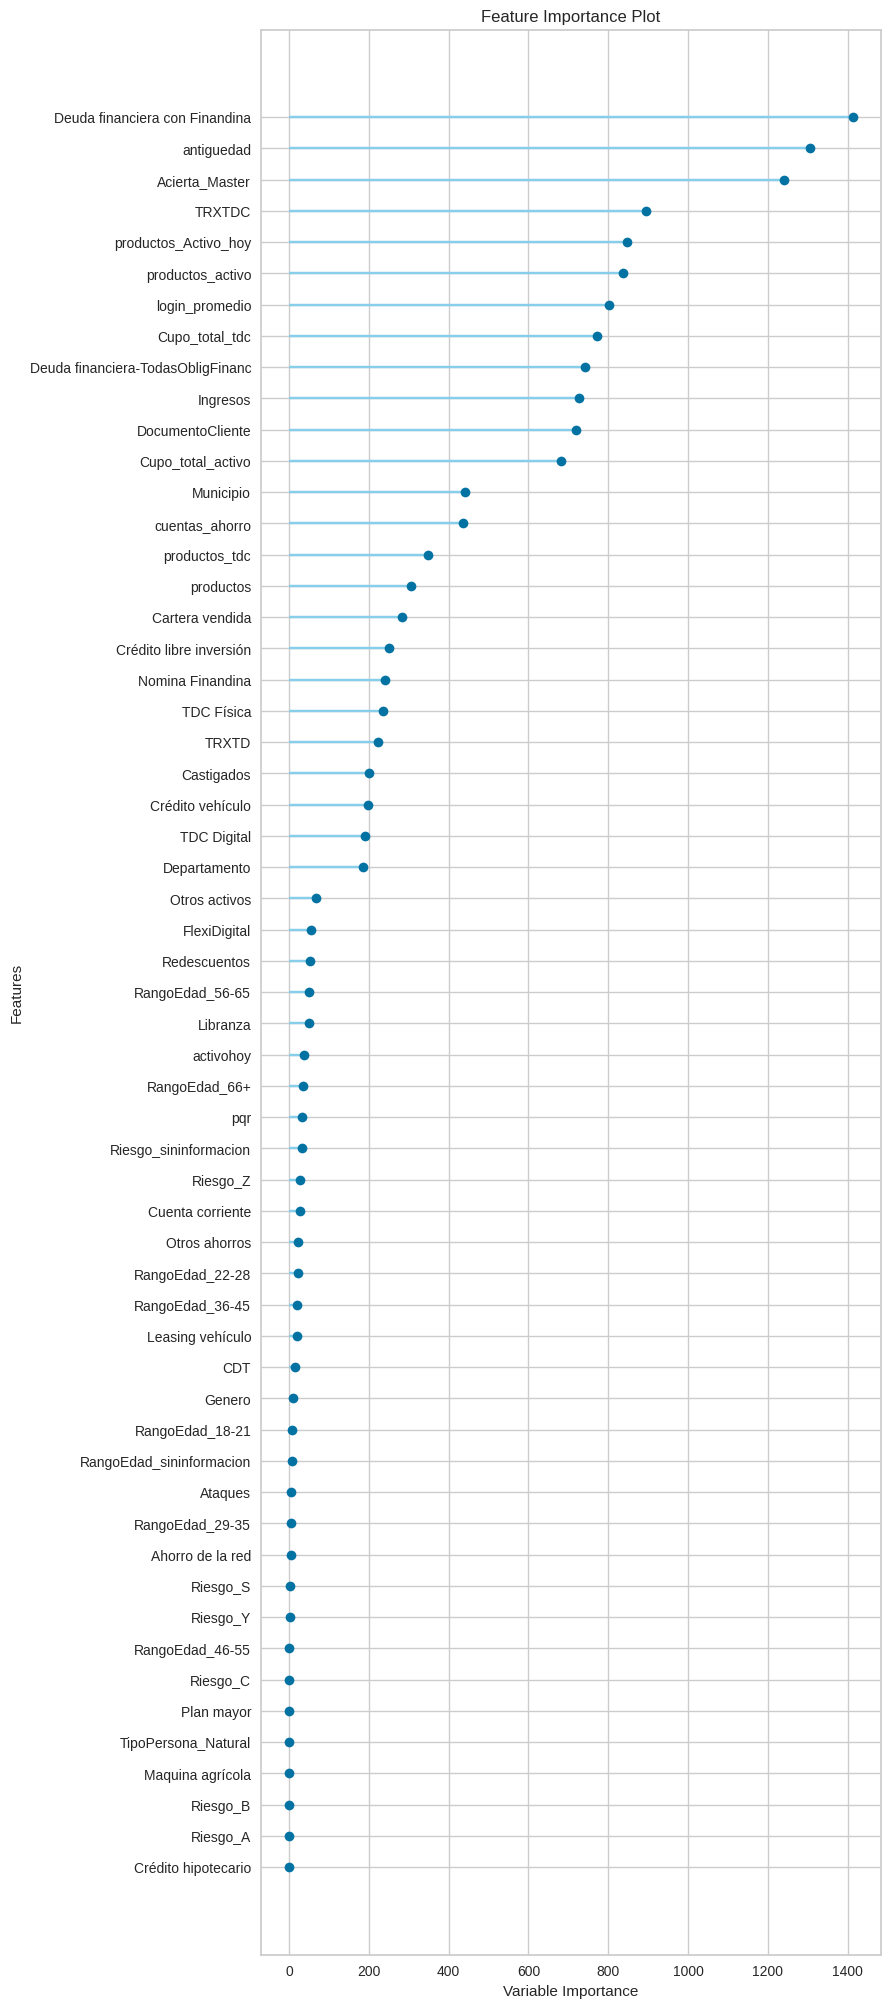

In [ ]:
plot_model(tuned_modelo,plot='feature_all')

In [ ]:
plot_model(tuned_modelo,plot='parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.05
max_depth,-1
min_child_samples,66
min_child_weight,0.001
min_split_gain,0.5
n_estimators,170


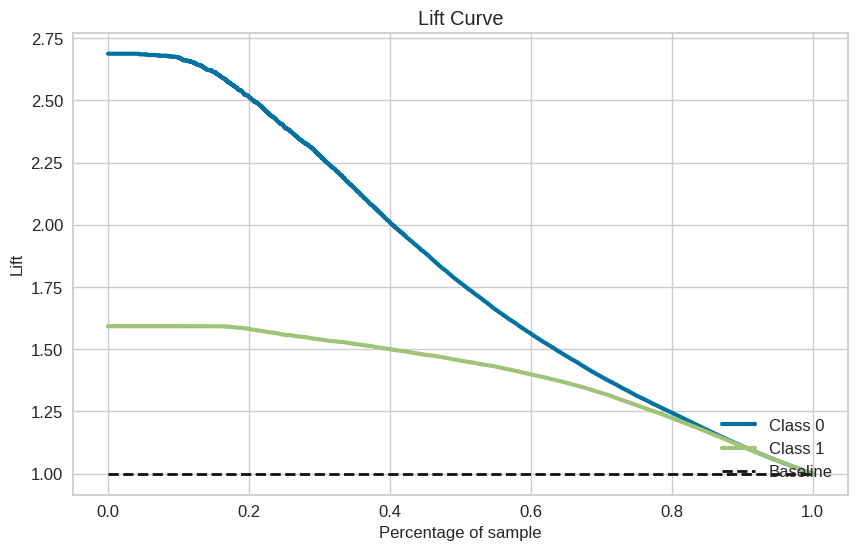

In [ ]:
plot_model(tuned_modelo,plot='lift')

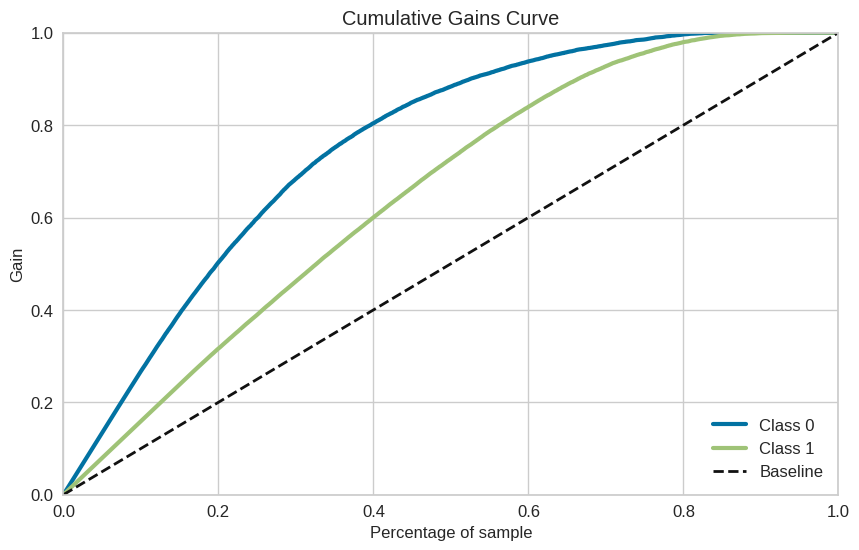

In [ ]:
plot_model(tuned_modelo,plot='gain')

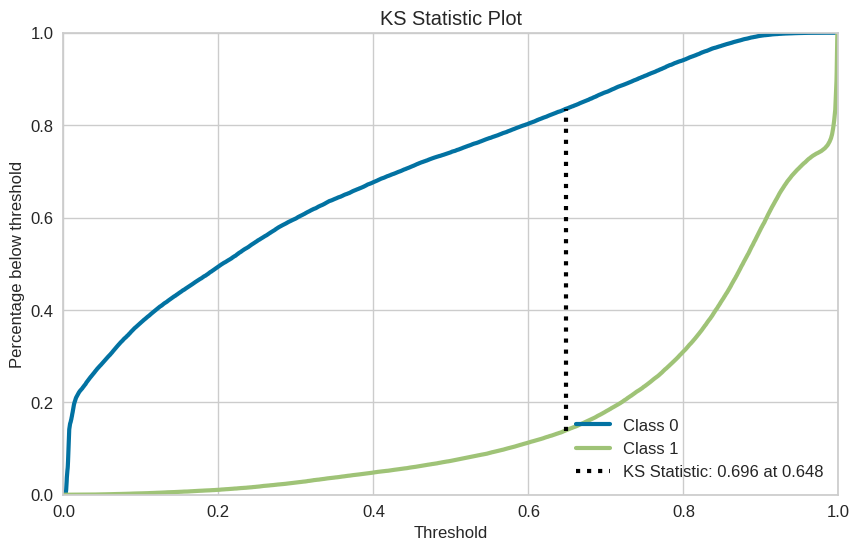

In [ ]:
plot_model(tuned_modelo,plot='ks')

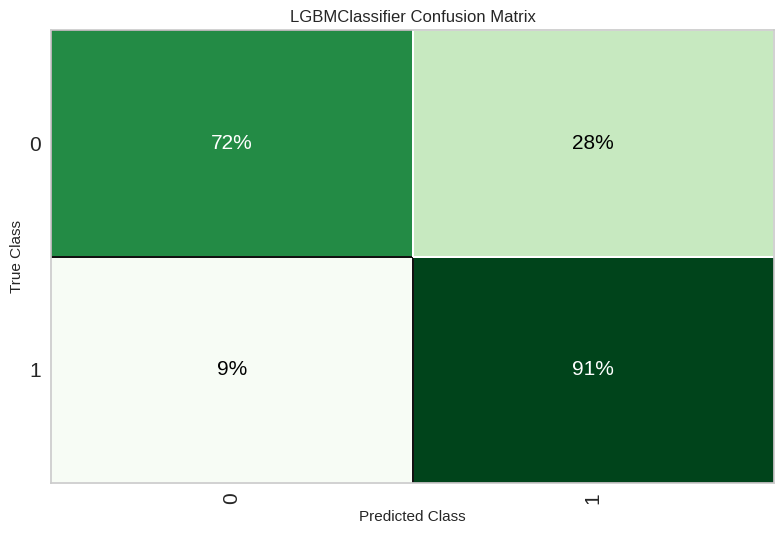

In [ ]:
plot_model(tuned_modelo, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

In [ ]:
from pycaret.classification import *
predicciones = predict_model(tuned_modelo,data=data_unusen)

display(predicciones.sample(30))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8898,0.9491,0.9514,0.9035,0.9268,0.7039,0.7078


[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0


,DocumentoCliente,Ahorro de la red,CDT,Cartera vendida,Castigados,Crédito hipotecario,Crédito libre inversión,Crédito vehículo,Cuenta corriente,FlexiDigital,...,productos,productos_activo,Cupo_total_activo,cuentas_ahorro,productos_tdc,Cupo_total_tdc,Genero,retener,prediction_label,prediction_score
267,1030598841,0,0,0,0,0,0,0,0,0,...,2,10,24769997,3,11,61699999,Masculino,0,0,0.6596
41971,1098615738,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,Masculino,1,1,0.9961
15394,1214714226,0,0,0,0,0,0,0,0,0,...,2,7,26107998,6,12,16561000,Masculino,0,0,0.5905
24784,19227747,0,1,0,0,0,0,0,0,0,...,2,0,0,0,0,0,Masculino,1,1,0.9965
29610,1073676570,0,0,0,0,0,0,0,0,1,...,1,2,1299999,10,1,0,Femenino,0,0,0.7060
20527,1067880177,1,0,0,0,0,0,0,0,0,...,3,9,24899998,10,6,6149999,Femenino,0,0,0.9929
6228,1040753734,0,0,0,0,0,0,0,0,0,...,2,7,42409000,3,3,2820000,Masculino,0,1,0.6672
33077,51703886,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,Femenino,1,1,0.9980
38745,85457758,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,Masculino,1,1,0.9935
17701,1037646292,0,0,0,0,0,0,0,0,1,...,2,0,0,0,0,0,Masculino,1,1,0.9976


In [ ]:
# modelo final entrenado con todo el conjunto de datos
final_modelo=finalize_model(tuned_modelo)

In [ ]:
print(final_modelo)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['DocumentoCliente',
                                             'Ahorro de la red', 'CDT',
                                             'Cartera vendida', 'Castigados',
                                             'Crédito hipotecario',
                                             'Crédito libre inversión',
                                             'Crédito vehículo',
                                             'Cuenta corriente', 'FlexiDigital',
                                             'Leasing vehículo', 'Libranza',
                                             'Maquina agrícola',
                                             'Nomina Finandina',
                                             'Otros activ...
                                boosting_type='gbdt', class_weight=None,
                               

In [ ]:
from google.colab import drive
from pycaret.classification import save_model

# Monta Google Drive
drive.mount('/content/drive')

# Guarda el modelo en la carpeta de Google Drive
modelo_a_guardar = final_modelo  # Reemplaza 'final_modelo' con tu modelo
nombre_del_modelo = 'ModeloPrepagoRetencion'  # Nombre del modelo
ruta_carpeta_drive = '/content/drive/My Drive/Modelos_FA'  # Ruta de la carpeta en Google Drive

# Guarda el modelo
save_model(modelo_a_guardar, f'{ruta_carpeta_drive}/{nombre_del_modelo}')

# Muestra un mensaje de confirmación
print("El modelo se guardó en Google Drive.")


Mounted at /content/drive
Transformation Pipeline and Model Successfully Saved
El modelo se guardó en Google Drive.
